# Capstone Project - The Severity of Collisions  (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Say you are driving to another city for work or to visit some friends. It is rainy and windy, and on the way, you come across a terrible traffic jam on the other side of the highway. 
Long lines of cars barely moving. As you keep driving, police car start appearing from afar shutting down the highway. 
Oh, it is an accident and there's a helicopter transporting the ones involved in the crash to the nearest hospital. They must be in critical condition for all of this to be happening.
Now, wouldn't it be great if there is **something in place** that could warn you, given the **weather** and the **road conditions** about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully or even change your travel if you are able to.

Data that might contribute to determining Collisions and his severity might include **Collision Address type,Location, Collision type, Road Condition, wheather and number of objects or people involved in the collision.**
This project aims to predict severity type of any accidents.

Clearly, those who **work long distances** or **frequent certain places** are interested in finding routes where they are not delayed or even postponed due to sudden accidents.
In addition, **the state** may also be interested to be on the lookout for any collisions or accidents at certain locations.

## Data <a name="data"></a>

Let's use our shared data for Seattle city as an example of how to deal with the accidents data. 
The label (target) for the data set is SEVERITY, which describes the fatality of an accident. 

You will notice that the shared data has unbalanced labels (approximately 70% Class 1 and 30% Class 2).
So, balance data is possible with:

* Random Over-Sampling
* Random Under-Sampling

But, That balance is exactly before Modeling. 

Exploratory data will be with original data. For instance, coordenates X and Y will use like longitude and latitude corresponding. So to describe our data on a map, use exactly **the mean** about this metrics.

## Load Data From CSV File

In [1]:
import pandas as pd
df = pd.read_csv('Data-Collisions.csv', low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Convert to date time object

In [2]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDATE'].values, df['INCDTTM'].values

(array(['2013-03-27T00:00:00.000000000', '2006-12-20T00:00:00.000000000',
        '2004-11-18T00:00:00.000000000', ...,
        '2019-01-19T00:00:00.000000000', '2019-01-15T00:00:00.000000000',
        '2018-11-30T00:00:00.000000000'], dtype='datetime64[ns]'),
 array(['2013-03-27T14:54:00.000000000', '2006-12-20T18:55:00.000000000',
        '2004-11-18T10:20:00.000000000', ...,
        '2019-01-19T09:25:00.000000000', '2019-01-15T16:48:00.000000000',
        '2018-11-30T15:45:00.000000000'], dtype='datetime64[ns]'))

### To display a map, we need to clean missing values over X and Y

In [3]:
import folium

df.X.dropna(inplace=True)
df.Y.dropna(inplace=True)
# create map and display it
sanfran_map = folium.Map(location=[df.Y.mean(), df.X.mean()], zoom_start=12)

# display the map of Seattle
sanfran_map

## Data visualization and pre-processing

In [4]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [5]:
df['dayofweek'] = df['INCDATE'].dt.dayofweek

To describe in the time only use the first 4 categories of Wheater

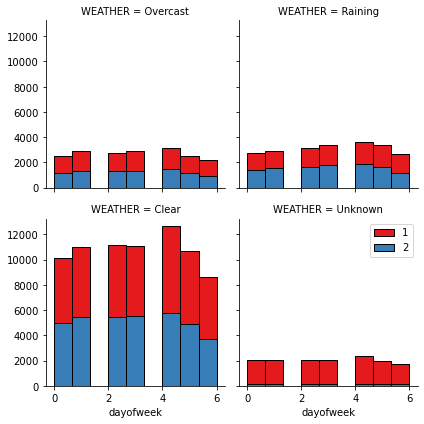

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_weather_especific = df[df.WEATHER.isin(['Clear', 'Raining','Overcast','Unknown'])]

bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df_weather_especific, col="WEATHER", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that severity of collision is concentrate over several days of the week. Sort values we can see that separation.

In [7]:
df['dayofweek'].value_counts().sort_values()

6    21955
0    26338
5    27389
1    28556
2    28778
3    29324
4    32333
Name: dayofweek, dtype: int64

In [8]:
df['hourofday'] = df['INCDTTM'].dt.hour

But this concentrate is not discriminate. So we use dayofweek in the same condition.
Now see per hour.

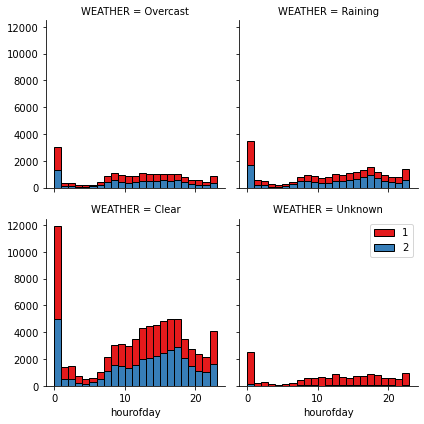

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_weather_especific = df[df.WEATHER.isin(['Clear', 'Raining','Overcast','Unknown'])]

bins = np.linspace(df.hourofday.min(), df.hourofday.max(), 24)
g = sns.FacetGrid(df_weather_especific, col="WEATHER", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'hourofday', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

How day of week is not relevant vs Severity collision but analyze hour instead day we can see almost three schedule spaces. But, sort values per hour we can separate this spaces.

In [10]:
df['hourofday'].value_counts().sort_values()

4      1222
3      1665
5      1667
6      3199
1      3408
2      3606
23     4611
22     5468
21     5571
20     6236
7      6543
19     7256
10     7465
9      8052
11     8209
8      8570
18     9743
13    10219
12    10384
14    10615
15    11514
16    12122
17    12947
0     34381
Name: hourofday, dtype: int64

So, the schedule spaces are:
* 1 Morning - between 7 and 12
* 2 Afternoon - between 12 and 20
* 3 Night - between 20 and 0 hours
* 4 Midnight - between 0 and 1 hours
* 5 Early morning - between 1 and 7 hours

In [11]:
df['HourState'] = df['hourofday'].apply(lambda x: 1 if (x>=7) and (x<12) else (2 if (x>=12) and (x<20) else ( 3 if (x>=20) and (x<24) else( 4 if (x>=0) and (x<1) else 5))))
set(df.HourState)

{1, 2, 3, 4, 5}

In [12]:
df_weather_especific.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER   SEVERITYCODE
Clear     1               0.677509
          2               0.322491
Overcast  1               0.684456
          2               0.315544
Raining   1               0.662815
          2               0.337185
Unknown   1               0.945928
          2               0.054072
Name: SEVERITYCODE, dtype: float64

**94%** of wheater **Unknown** is prop damage and **33%** is injury when there is **Raining**.

In [13]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

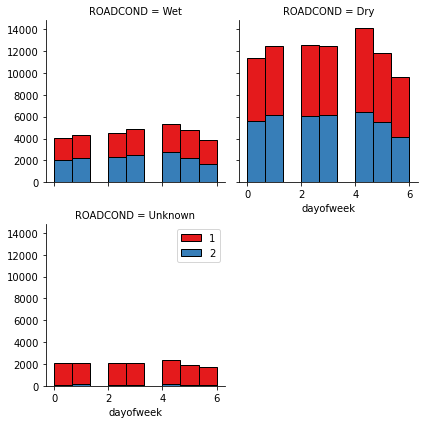

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df_roadcond_especific = df[df.ROADCOND.isin(['Dry', 'Wet','Unknown'])]

bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df_roadcond_especific, col="ROADCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

## Missing Values

In [15]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY,dayofweek,hourofday,HourState
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05,194673.000000,194673.000000,194673.000000
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03,2.938728,11.167106,2.493700
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04,1.921549,7.075297,1.207202
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00,1.000000,6.000000,2.000000
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00,3.000000,12.000000,2.000000
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00,5.000000,17.000000,4.000000
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06,6.000000,23.000000,5.000000


INTKEY is the key that corresponds to the intersection associated with a collision, so we prefer use ADDRTYPE tranform from Categorical to Cuantitive value and drop INTKEY.
In addition, there is not cuantitive variables with mising values except with X (Longitude) and Y (Latitude).

In [16]:
df.drop(['INTKEY'], axis=1, inplace=True)

Before to analyze categorical variables, we need to drop redundant information

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 40 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   SEVERITYCODE    194673 non-null  int64              
 1   X               189339 non-null  float64            
 2   Y               189339 non-null  float64            
 3   OBJECTID        194673 non-null  int64              
 4   INCKEY          194673 non-null  int64              
 5   COLDETKEY       194673 non-null  int64              
 6   REPORTNO        194673 non-null  object             
 7   STATUS          194673 non-null  object             
 8   ADDRTYPE        192747 non-null  object             
 9   LOCATION        191996 non-null  object             
 10  EXCEPTRSNCODE   84811 non-null   object             
 11  EXCEPTRSNDESC   5638 non-null    object             
 12  SEVERITYCODE.1  194673 non-null  int64              
 13  SEVERITYDESC  

Details:

* SEVERITYCODE is the label, it is OK!
* X=Longitud and Y=Latitud are OK!. 
* OBJECTID is a index, so is not necessary,
* INCKEY is a index, so is not necessary,
* COLDETKEY is a secundary index, so is not necessary, 
* REPORTNO is a index, so is not necessary,         
* STATUS is not necessary,          
* ADDRTYPE is OK!.
* LOCATION we have latitude and longitude, so is not necessary,
* EXCEPTRSNCODE there is not description, so is dismissed,     
* EXCEPTRSNDESC there is not description, so is dismissed,
* SEVERITYCODE.1 is the same to SEVERITY CODE, so is not necessary, 
* SEVERITYDESC is a description of SEVERITY CODE, so is not necessary,      
* COLLISIONTYPE is OK!.
* PERSONCOUNT is OK!.          
* PEDCOUNT is OK!.       
* PEDCYLCOUNT is OK!.            
* VEHCOUNT is OK!.         
* INCDATE we have HourState, so is not necessary,
* INCDTTM we have HourState, so is not necessary,
* JUNCTIONTYPE we have ADDRTYPE, so is no necessary,         
* SDOT_COLCODE is a code, so is not necessary,        
* SDOT_COLDESC is a description SDOT_COLCODE, so is not necessary,         
* INATTENTIONIND there is not sufficient data, so is not necessary, 
* UNDERINFL is OK!.   
* WEATHER is OK!.       
* ROADCOND is OK!.          
* LIGHTCOND is OK!.          
* PEDROWNOTGRNT there is not sufficient data, so is not necessary,      
* SDOTCOLNUM is a number given to the colission, so is not necessary,    
* SPEEDING there is not sufficient data, so is not necessary,           
* ST_COLCODE is a code, so is not necessary,         
* ST_COLDESC is a description ST_COLCODE, so is not necessary,   
* SEGLANEKEY is a code, so is not necessary,       
* CROSSWALKKEY is a key, so is not necessary,   
* HITPARKEDCAR is OK!.      
* dayofweek is OK!.
* hourofday we have HourState, so is not necessary,

### Drop columns are not necessary to the model

In [18]:
df.drop(['LOCATION', 'OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC',
         'SEVERITYCODE.1','SEVERITYDESC','INCDATE','INCDTTM','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC',
         'INATTENTIONIND','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','hourofday'], axis=1,inplace=True)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,dayofweek,HourState
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,N,Overcast,Wet,Daylight,N,2,2
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,0,Raining,Wet,Dark - Street Lights On,N,2,2
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,0,Overcast,Dry,Daylight,N,3,1
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,N,Clear,Dry,Daylight,N,4,1
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,0,Raining,Wet,Daylight,N,2,1



Now, I have a question!!. My Label (target) is balanced?

**That is what we will see next**

## Unbalance Label (Target)

Class 1: 136485
Class 2: 58188
Proportion: 2.35 : 1


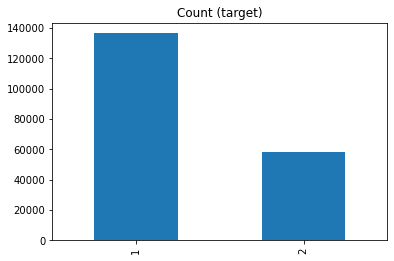

In [19]:
import numpy as np

target_count = df['SEVERITYCODE'].value_counts()
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Proportion:', round(target_count[1] / target_count[2], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

## Resampling

In [20]:
# Class count
count_class_1, count_class_2 = df['SEVERITYCODE'].value_counts()

# Divide by class
df_class_1 = df[df['SEVERITYCODE'] == 1]
df_class_2 = df[df['SEVERITYCODE'] == 2]

### Random Over - Sampling

Random over-sampling:
2    136485
1    136485
Name: SEVERITYCODE, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

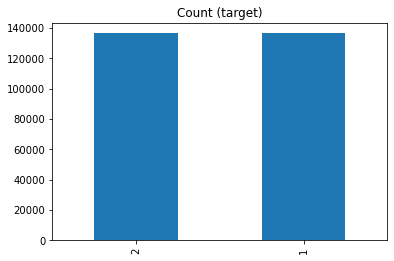

In [21]:
df_class_2_over = df_class_2.sample(count_class_1, replace=True)
df_over = pd.concat([df_class_1, df_class_2_over], axis=0)

print('Random over-sampling:')
print(df_over['SEVERITYCODE'].value_counts())

df_over['SEVERITYCODE'].value_counts().plot(kind='bar', title='Count (target)')

### Random Under - Sampling (Optional)

In [22]:
'''df_class_1_under = df_class_1.sample(count_class_2)
df_under = pd.concat([df_class_1_under, df_class_2], axis=0)

print('Random under-sampling:')
print(df_under['SEVERITYCODE'].value_counts())

df_under['SEVERITYCODE'].value_counts().plot(kind='bar', title='Count (target)')'''

"df_class_1_under = df_class_1.sample(count_class_2)\ndf_under = pd.concat([df_class_1_under, df_class_2], axis=0)\n\nprint('Random under-sampling:')\nprint(df_under['SEVERITYCODE'].value_counts())\n\ndf_under['SEVERITYCODE'].value_counts().plot(kind='bar', title='Count (target)')"

## Convert Categorical features to numerical values


To transform the categorical characteristics we will use two methods:

1. Transform categorical variables to numeric variables directly or
2. One hot encoding. Addition to this, delete some values with little information


### First Method

In [23]:
df_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272970 entries, 1 to 43073
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   272970 non-null  int64  
 1   X              266140 non-null  float64
 2   Y              266140 non-null  float64
 3   ADDRTYPE       270789 non-null  object 
 4   COLLISIONTYPE  266717 non-null  object 
 5   PERSONCOUNT    272970 non-null  int64  
 6   PEDCOUNT       272970 non-null  int64  
 7   PEDCYLCOUNT    272970 non-null  int64  
 8   VEHCOUNT       272970 non-null  int64  
 9   UNDERINFL      266749 non-null  object 
 10  WEATHER        266472 non-null  object 
 11  ROADCOND       266594 non-null  object 
 12  LIGHTCOND      266378 non-null  object 
 13  HITPARKEDCAR   272970 non-null  object 
 14  dayofweek      272970 non-null  int64  
 15  HourState      272970 non-null  int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 35.4+ MB


In [24]:
df_over.ADDRTYPE.value_counts().sort_values()

Alley              887
Intersection    102745
Block           167157
Name: ADDRTYPE, dtype: int64

In [25]:
df_over['ADDRTYPE'].replace(to_replace=['Block','Intersection','Alley'], value=[0,1,2],inplace=True)
df_over.ADDRTYPE.value_counts().sort_values()

2.0       887
1.0    102745
0.0    167157
Name: ADDRTYPE, dtype: int64

In [26]:
df_over.UNDERINFL.value_counts().sort_values()

1      6181
Y      7874
0    110755
N    141939
Name: UNDERINFL, dtype: int64

In [27]:
df_over['UNDERINFL'].replace(to_replace=['N','Y'], value=['0','1'],inplace=True)
df_over['UNDERINFL'].replace(to_replace=['0','1'], value=[0,1],inplace=True)
df_over.UNDERINFL.value_counts().sort_values()

1.0     14055
0.0    252694
Name: UNDERINFL, dtype: int64

In [28]:
df_over.HITPARKEDCAR.value_counts().sort_values()

Y      7856
N    265114
Name: HITPARKEDCAR, dtype: int64

In [29]:
df_over['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df_over.HITPARKEDCAR.value_counts().sort_values()

1      7856
0    265114
Name: HITPARKEDCAR, dtype: int64

### Second Method (One hot enconding)

In [30]:
df_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272970 entries, 1 to 43073
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   272970 non-null  int64  
 1   X              266140 non-null  float64
 2   Y              266140 non-null  float64
 3   ADDRTYPE       270789 non-null  float64
 4   COLLISIONTYPE  266717 non-null  object 
 5   PERSONCOUNT    272970 non-null  int64  
 6   PEDCOUNT       272970 non-null  int64  
 7   PEDCYLCOUNT    272970 non-null  int64  
 8   VEHCOUNT       272970 non-null  int64  
 9   UNDERINFL      266749 non-null  float64
 10  WEATHER        266472 non-null  object 
 11  ROADCOND       266594 non-null  object 
 12  LIGHTCOND      266378 non-null  object 
 13  HITPARKEDCAR   272970 non-null  int64  
 14  dayofweek      272970 non-null  int64  
 15  HourState      272970 non-null  int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 35.4+ MB


In [31]:
df_over = df_over.dropna()

In [32]:
df_over.reset_index(drop=True)

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,dayofweek,HourState
0,1,-122.347294,47.647172,0.0,Sideswipe,2,0,0,2,0.0,Raining,Wet,Dark - Street Lights On,0,2,2
1,1,-122.334540,47.607871,0.0,Parked Car,4,0,0,3,0.0,Overcast,Dry,Daylight,0,3,1
2,1,-122.334803,47.604803,0.0,Other,3,0,0,3,0.0,Clear,Dry,Daylight,0,4,1
3,1,-122.387598,47.690575,1.0,Angles,2,0,0,2,0.0,Clear,Dry,Daylight,0,5,2
4,1,-122.338485,47.618534,1.0,Angles,2,0,0,2,0.0,Raining,Wet,Daylight,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259500,2,-122.351191,47.517337,0.0,Rear Ended,4,0,0,3,0.0,Clear,Dry,Daylight,0,4,2
259501,2,-122.287209,47.661371,1.0,Rear Ended,3,0,0,2,0.0,Unknown,Unknown,Daylight,0,1,2
259502,2,-122.339439,47.564500,1.0,Sideswipe,4,0,0,4,0.0,Overcast,Wet,Daylight,0,1,1
259503,2,-122.332429,47.601720,0.0,Sideswipe,2,0,0,2,0.0,Clear,Wet,Dark - Street Lights On,0,5,3



Before to use one hot enconding, separate types features not object


In [33]:
Features = df_over[['ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','UNDERINFL','HITPARKEDCAR','dayofweek','HourState']]

In [34]:
df_over.COLLISIONTYPE.value_counts().sort_values()

Head On        3141
Right Turn     3765
Cycles        11679
Pedestrian    14515
Left Turn     20910
Sideswipe     21342
Other         30054
Parked Car    49639
Rear Ended    51926
Angles        52534
Name: COLLISIONTYPE, dtype: int64

In [35]:
Features = pd.concat([Features,pd.get_dummies(df_over['COLLISIONTYPE'])], axis=1)
Features.drop(['Right Turn','Head On'], axis = 1,inplace=True)
Features.columns

Index(['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'UNDERINFL', 'HITPARKEDCAR', 'dayofweek', 'HourState', 'Angles',
       'Cycles', 'Left Turn', 'Other', 'Parked Car', 'Pedestrian',
       'Rear Ended', 'Sideswipe'],
      dtype='object')

In [36]:
Features = Features.rename(columns={'Angles':'COLLISIONTYPE ANGLES','Parked Car':'COLLISIONTYPE PARKED CAR',
                                    'Left Turn':'COLLISIONTYPE LEFT TURN','Other':'COLLISIONTYPE OTHER',
                                    'Rear Ended':'COLLISIONTYPE REAR ENDED','Sideswipe':'COLLISIONTYPE SIDESWIPE',
                                    'Pedestrian':'COLLISIONTYPE PEDESTRIAN','Cycles':'COLLISIONTYPE CYCLES'})
Features.columns

Index(['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'UNDERINFL', 'HITPARKEDCAR', 'dayofweek', 'HourState',
       'COLLISIONTYPE ANGLES', 'COLLISIONTYPE CYCLES',
       'COLLISIONTYPE LEFT TURN', 'COLLISIONTYPE OTHER',
       'COLLISIONTYPE PARKED CAR', 'COLLISIONTYPE PEDESTRIAN',
       'COLLISIONTYPE REAR ENDED', 'COLLISIONTYPE SIDESWIPE'],
      dtype='object')

In [37]:
df_over.WEATHER.value_counts().sort_values()

Partly Cloudy                   10
Severe Crosswind                27
Blowing Sand/Dirt               66
Sleet/Hail/Freezing Rain       146
Fog/Smog/Smoke                 781
Other                          926
Snowing                       1094
Unknown                      14860
Overcast                     38560
Raining                      46815
Clear                       156220
Name: WEATHER, dtype: int64

In [38]:
Features = pd.concat([Features,pd.get_dummies(df_over['WEATHER'])], axis=1)
Features.drop(['Partly Cloudy','Severe Crosswind','Blowing Sand/Dirt','Sleet/Hail/Freezing Rain',
              'Fog/Smog/Smoke','Snowing','Other'], axis = 1,inplace=True)
Features.columns

Index(['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'UNDERINFL', 'HITPARKEDCAR', 'dayofweek', 'HourState',
       'COLLISIONTYPE ANGLES', 'COLLISIONTYPE CYCLES',
       'COLLISIONTYPE LEFT TURN', 'COLLISIONTYPE OTHER',
       'COLLISIONTYPE PARKED CAR', 'COLLISIONTYPE PEDESTRIAN',
       'COLLISIONTYPE REAR ENDED', 'COLLISIONTYPE SIDESWIPE', 'Clear',
       'Overcast', 'Raining', 'Unknown'],
      dtype='object')

In [39]:
Features = Features.rename(columns={'Clear':'WEATHER CLEAR','Overcast':'WEATHER OVERCAST',
                                    'Raining':'WEATHER RAINING','Unknown':'WEATHER UNKNOWN'})
Features.columns

Index(['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'UNDERINFL', 'HITPARKEDCAR', 'dayofweek', 'HourState',
       'COLLISIONTYPE ANGLES', 'COLLISIONTYPE CYCLES',
       'COLLISIONTYPE LEFT TURN', 'COLLISIONTYPE OTHER',
       'COLLISIONTYPE PARKED CAR', 'COLLISIONTYPE PEDESTRIAN',
       'COLLISIONTYPE REAR ENDED', 'COLLISIONTYPE SIDESWIPE', 'WEATHER CLEAR',
       'WEATHER OVERCAST', 'WEATHER RAINING', 'WEATHER UNKNOWN'],
      dtype='object')

In [40]:
df_over.ROADCOND.value_counts().sort_values()

Oil                   92
Sand/Mud/Dirt         94
Standing Water       147
Other                184
Snow/Slush          1191
Ice                 1515
Unknown            14706
Wet                66830
Dry               174746
Name: ROADCOND, dtype: int64

In [41]:
Features = pd.concat([Features,pd.get_dummies(df_over['ROADCOND'])], axis=1)
Features.drop(['Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'], axis = 1,inplace=True)
Features.columns

Index(['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'UNDERINFL', 'HITPARKEDCAR', 'dayofweek', 'HourState',
       'COLLISIONTYPE ANGLES', 'COLLISIONTYPE CYCLES',
       'COLLISIONTYPE LEFT TURN', 'COLLISIONTYPE OTHER',
       'COLLISIONTYPE PARKED CAR', 'COLLISIONTYPE PEDESTRIAN',
       'COLLISIONTYPE REAR ENDED', 'COLLISIONTYPE SIDESWIPE', 'WEATHER CLEAR',
       'WEATHER OVERCAST', 'WEATHER RAINING', 'WEATHER UNKNOWN', 'Dry',
       'Unknown', 'Wet'],
      dtype='object')

In [42]:
Features = Features.rename(columns={'Dry':'ROADCOND DRY','Wet':'ROADCOND WET','Unknown':'ROADCOND UNKNOWN'})
Features.columns

Index(['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'UNDERINFL', 'HITPARKEDCAR', 'dayofweek', 'HourState',
       'COLLISIONTYPE ANGLES', 'COLLISIONTYPE CYCLES',
       'COLLISIONTYPE LEFT TURN', 'COLLISIONTYPE OTHER',
       'COLLISIONTYPE PARKED CAR', 'COLLISIONTYPE PEDESTRIAN',
       'COLLISIONTYPE REAR ENDED', 'COLLISIONTYPE SIDESWIPE', 'WEATHER CLEAR',
       'WEATHER OVERCAST', 'WEATHER RAINING', 'WEATHER UNKNOWN',
       'ROADCOND DRY', 'ROADCOND UNKNOWN', 'ROADCOND WET'],
      dtype='object')

In [43]:
df_over.LIGHTCOND.value_counts().sort_values()

Dark - Unknown Lighting         12
Other                          249
Dark - Street Lights Off      1567
Dark - No Street Lights       1874
Dawn                          3549
Dusk                          8389
Unknown                      13166
Dark - Street Lights On      66461
Daylight                    164238
Name: LIGHTCOND, dtype: int64

In [44]:
Features = pd.concat([Features,pd.get_dummies(df_over['LIGHTCOND'])], axis=1)
Features.drop(['Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other',
               'Dark - Unknown Lighting'], axis = 1,inplace=True)
Features.columns

Index(['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'UNDERINFL', 'HITPARKEDCAR', 'dayofweek', 'HourState',
       'COLLISIONTYPE ANGLES', 'COLLISIONTYPE CYCLES',
       'COLLISIONTYPE LEFT TURN', 'COLLISIONTYPE OTHER',
       'COLLISIONTYPE PARKED CAR', 'COLLISIONTYPE PEDESTRIAN',
       'COLLISIONTYPE REAR ENDED', 'COLLISIONTYPE SIDESWIPE', 'WEATHER CLEAR',
       'WEATHER OVERCAST', 'WEATHER RAINING', 'WEATHER UNKNOWN',
       'ROADCOND DRY', 'ROADCOND UNKNOWN', 'ROADCOND WET',
       'Dark - Street Lights On', 'Daylight', 'Dusk', 'Unknown'],
      dtype='object')

In [45]:
Features = Features.rename(columns={'Dark - Street Lights On':'LIGHTCOND DARK-STREET LIGHTS ON',
                                    'Dusk':'LIGHTCOND DUSK','Daylight':'LIGHTCOND WET','Unknown':'LIGHTCOND UNKNOWN'})
Features.columns

Index(['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'UNDERINFL', 'HITPARKEDCAR', 'dayofweek', 'HourState',
       'COLLISIONTYPE ANGLES', 'COLLISIONTYPE CYCLES',
       'COLLISIONTYPE LEFT TURN', 'COLLISIONTYPE OTHER',
       'COLLISIONTYPE PARKED CAR', 'COLLISIONTYPE PEDESTRIAN',
       'COLLISIONTYPE REAR ENDED', 'COLLISIONTYPE SIDESWIPE', 'WEATHER CLEAR',
       'WEATHER OVERCAST', 'WEATHER RAINING', 'WEATHER UNKNOWN',
       'ROADCOND DRY', 'ROADCOND UNKNOWN', 'ROADCOND WET',
       'LIGHTCOND DARK-STREET LIGHTS ON', 'LIGHTCOND WET', 'LIGHTCOND DUSK',
       'LIGHTCOND UNKNOWN'],
      dtype='object')

Others *rename* columns

In [46]:
Features = Features.rename(columns={'dayofweek':'DAYOFWEEK','HourState':'HOURSTATE','X':'LONGITUDE','Y':'LATITUDE'})
Features.columns

Index(['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'UNDERINFL', 'HITPARKEDCAR', 'DAYOFWEEK', 'HOURSTATE',
       'COLLISIONTYPE ANGLES', 'COLLISIONTYPE CYCLES',
       'COLLISIONTYPE LEFT TURN', 'COLLISIONTYPE OTHER',
       'COLLISIONTYPE PARKED CAR', 'COLLISIONTYPE PEDESTRIAN',
       'COLLISIONTYPE REAR ENDED', 'COLLISIONTYPE SIDESWIPE', 'WEATHER CLEAR',
       'WEATHER OVERCAST', 'WEATHER RAINING', 'WEATHER UNKNOWN',
       'ROADCOND DRY', 'ROADCOND UNKNOWN', 'ROADCOND WET',
       'LIGHTCOND DARK-STREET LIGHTS ON', 'LIGHTCOND WET', 'LIGHTCOND DUSK',
       'LIGHTCOND UNKNOWN'],
      dtype='object')


Lets defind feature sets, X:


In [47]:
Features.describe(include='all')

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,DAYOFWEEK,HOURSTATE,COLLISIONTYPE ANGLES,...,WEATHER OVERCAST,WEATHER RAINING,WEATHER UNKNOWN,ROADCOND DRY,ROADCOND UNKNOWN,ROADCOND WET,LIGHTCOND DARK-STREET LIGHTS ON,LIGHTCOND WET,LIGHTCOND DUSK,LIGHTCOND UNKNOWN
count,259505.000000,259505.000000,259505.00000,259505.000000,259505.000000,259505.000000,259505.000000,259505.000000,259505.000000,259505.000000,...,259505.000000,259505.000000,259505.000000,259505.000000,259505.000000,259505.000000,259505.000000,259505.000000,259505.000000,259505.000000
mean,0.385804,2.543978,0.06117,0.045891,1.951446,0.052727,0.027818,2.929651,2.431610,0.202439,...,0.148591,0.180401,0.057263,0.673382,0.056669,0.257529,0.256107,0.632890,0.032327,0.050735
std,0.486786,1.430098,0.25103,0.211229,0.604041,0.223489,0.164452,1.920233,1.185183,0.401819,...,0.355685,0.384522,0.232345,0.468977,0.231210,0.437274,0.436482,0.482018,0.176867,0.219457
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.00000,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.00000,0.000000,2.000000,0.000000,0.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,0.00000,0.000000,2.000000,0.000000,0.000000,5.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,81.000000,6.00000,2.000000,12.000000,1.000000,1.000000,6.000000,5.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



We see two columns with possible null values


In [48]:
set(Features['ADDRTYPE'].unique())

{0.0, 1.0}

In [49]:
Features['ADDRTYPE'].dropna(inplace=True)
set(Features['ADDRTYPE'].unique())

{0.0, 1.0}

In [50]:
set(Features['UNDERINFL'].unique())

{0.0, 1.0}

In [51]:
Features['UNDERINFL'].dropna(inplace=True)
set(Features['UNDERINFL'].unique())

{0.0, 1.0}

In [52]:
Features.columns

Index(['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'UNDERINFL', 'HITPARKEDCAR', 'DAYOFWEEK', 'HOURSTATE',
       'COLLISIONTYPE ANGLES', 'COLLISIONTYPE CYCLES',
       'COLLISIONTYPE LEFT TURN', 'COLLISIONTYPE OTHER',
       'COLLISIONTYPE PARKED CAR', 'COLLISIONTYPE PEDESTRIAN',
       'COLLISIONTYPE REAR ENDED', 'COLLISIONTYPE SIDESWIPE', 'WEATHER CLEAR',
       'WEATHER OVERCAST', 'WEATHER RAINING', 'WEATHER UNKNOWN',
       'ROADCOND DRY', 'ROADCOND UNKNOWN', 'ROADCOND WET',
       'LIGHTCOND DARK-STREET LIGHTS ON', 'LIGHTCOND WET', 'LIGHTCOND DUSK',
       'LIGHTCOND UNKNOWN'],
      dtype='object')

In [53]:
set(Features['LIGHTCOND UNKNOWN'].unique())

{0, 1}


Lets defind feature sets, X:

In [54]:
X = Features
X[0:5]

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,DAYOFWEEK,HOURSTATE,COLLISIONTYPE ANGLES,...,WEATHER OVERCAST,WEATHER RAINING,WEATHER UNKNOWN,ROADCOND DRY,ROADCOND UNKNOWN,ROADCOND WET,LIGHTCOND DARK-STREET LIGHTS ON,LIGHTCOND WET,LIGHTCOND DUSK,LIGHTCOND UNKNOWN
1,0.0,2,0,0,2,0.0,0,2,2,0,...,0,1,0,0,0,1,1,0,0,0
2,0.0,4,0,0,3,0.0,0,3,1,0,...,1,0,0,1,0,0,0,1,0,0
3,0.0,3,0,0,3,0.0,0,4,1,0,...,0,0,0,1,0,0,0,1,0,0
5,1.0,2,0,0,2,0.0,0,5,2,1,...,0,0,0,1,0,0,0,1,0,0
6,1.0,2,0,0,2,0.0,0,1,4,1,...,0,1,0,0,0,1,0,1,0,0



What are our lables?

In [55]:
y=df_over['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [56]:
set(y)

{1, 2}

In [57]:
X.shape, y.shape

((259505, 28), (259505,))

Great! We have Our Dataset with 272,970 Collisions information and 28 Features

## Methodology <a name="methodology"></a>


The methodology used is the traditional one of normalizing the values ​​of the characteristics, then separating them into training and validation sets. For this we will use 20% of the data for validation.

As it is a classification problem, then we will use the Logistic Regression as the main alternative, the KNN, SVM and Decission Tree version will still be commented (These will not be touched due to execution time).

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [58]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.79255541, -0.38037887, -0.24367727, -0.21725843,  0.08038201,
        -0.23592844, -0.16915777, -0.48413525, -0.36417249, -0.50380849,
        -0.21708479, -0.29603724, -0.36191465, -0.48634054, -0.24340772,
        -0.50015052,  3.3405624 , -1.22984305, -0.41775959,  2.13147882,
        -0.24645704, -1.43585541, -0.24509952,  1.69795804,  1.7042948 ,
        -1.31300258, -0.18277547, -0.23118537],
       [-0.79255541,  1.01812953, -0.24367727, -0.21725843,  1.7359006 ,
        -0.23592844, -0.16915777,  0.0366359 , -1.20792575, -0.50380849,
        -0.21708479, -0.29603724, -0.36191465,  2.05617242, -0.24340772,
        -0.50015052, -0.29935079, -1.22984305,  2.39372126, -0.46915784,
        -0.24645704,  0.69644895, -0.24509952, -0.58894271, -0.58675295,
         0.76161313, -0.18277547, -0.23118537],
       [-0.79255541,  0.31887533, -0.24367727, -0.21725843,  1.7359006 ,
        -0.23592844, -0.16915777,  0.55740705, -1.20792575, -0.50380849,
        -0.21708479, -0.2960

# Classification 


We will use 20% of our data for the validation set.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207604, 28) (207604,)
Test set: (51901, 28) (51901,)


# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
yhat_final_LogRegression = LR.predict(X_test)
yhat_prob_LogRegression = LR.predict_proba(X_test)

from sklearn.metrics import f1_score,jaccard_score,log_loss

jaccard_score_LogRegression=jaccard_score(y_test, yhat_final_LogRegression,pos_label=1)
f1_score_LogRegression=f1_score(y_test, yhat_final_LogRegression, average='weighted')
log_loss=log_loss(y_test, yhat_prob_LogRegression)

print("Jaccard_score_LogRegression: ", jaccard_score_LogRegression)
print("F1_score_LogRegression: ",f1_score_LogRegression)
print("Log_Loss_score: ",log_loss)

Jaccard_score_LogRegression:  0.4959730225248821
F1_score_LogRegression:  0.6994792759112529
Log_Loss_score:  0.5418751339355719


In [61]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat_final_LogRegression))

              precision    recall  f1-score   support

           1       0.76      0.59      0.66     25657
           2       0.67      0.81      0.74     26244

    accuracy                           0.70     51901
   macro avg       0.71      0.70      0.70     51901
weighted avg       0.71      0.70      0.70     51901



# K Nearest Neighbor(KNN)

In [62]:
'''Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc'''

'Ks = 10\nmean_acc = np.zeros((Ks-1))\nstd_acc = np.zeros((Ks-1))\nfor n in range(1,Ks):\n    #Train Model and Predict  \n    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)\n    yhat=neigh.predict(X_test)\n    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)\n    \n    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])\n\nmean_acc'

In [63]:
'''plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()'''

"plt.plot(range(1,Ks),mean_acc,'g')\nplt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)\nplt.legend(('Accuracy ', '+/- 3xstd'))\nplt.ylabel('Accuracy ')\nplt.xlabel('Number of Neighbors (K)')\nplt.tight_layout()\nplt.show()"

In [64]:
'''print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)'''''

'print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)'

In [65]:
'''k = 7
#Train Model and Predict  
neigh_final = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_final = neigh_final.predict(X_test)
from sklearn.metrics import jaccard_score,f1_score

jaccard_score_KNN=jaccard_score(y_test, yhat_final,pos_label='PAIDOFF')
f1_score_KNN=f1_score(y_test, yhat_final, average='weighted')

print("Jaccard_score_KNN: ", jaccard_score_KNN)
print("F1_score_KNN: ",f1_score_KNN)'''

'k = 7\n#Train Model and Predict  \nneigh_final = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)\nyhat_final = neigh_final.predict(X_test)\nfrom sklearn.metrics import jaccard_score,f1_score\n\njaccard_score_KNN=jaccard_score(y_test, yhat_final,pos_label=\'PAIDOFF\')\nf1_score_KNN=f1_score(y_test, yhat_final, average=\'weighted\')\n\nprint("Jaccard_score_KNN: ", jaccard_score_KNN)\nprint("F1_score_KNN: ",f1_score_KNN)'

# Decision Tree

In [66]:
'''# Found max_depth=6 give us a better score.
from sklearn.tree import DecisionTreeClassifier
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
LoanTree.fit(X_train,y_train)
yhat_final_DecisionTree = LoanTree.predict(X_test)

from sklearn.metrics import jaccard_score, f1_score

jaccard_score_DecisionTree=jaccard_score(y_test, yhat_final_DecisionTree,pos_label='PAIDOFF')
f1_score_DecisionTree=f1_score(y_test, yhat_final_DecisionTree, average='weighted')

print("Jaccard_score_DecisionTree: ", jaccard_score_DecisionTree)
print("F1_score_DecisionTree: ",f1_score_DecisionTree)'''

'# Found max_depth=6 give us a better score.\nfrom sklearn.tree import DecisionTreeClassifier\nLoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)\nLoanTree.fit(X_train,y_train)\nyhat_final_DecisionTree = LoanTree.predict(X_test)\n\nfrom sklearn.metrics import jaccard_score, f1_score\n\njaccard_score_DecisionTree=jaccard_score(y_test, yhat_final_DecisionTree,pos_label=\'PAIDOFF\')\nf1_score_DecisionTree=f1_score(y_test, yhat_final_DecisionTree, average=\'weighted\')\n\nprint("Jaccard_score_DecisionTree: ", jaccard_score_DecisionTree)\nprint("F1_score_DecisionTree: ",f1_score_DecisionTree)'

# Support Vector Machine

In [67]:
'''from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat_final_SVM = clf.predict(X_test)

from sklearn.metrics import f1_score, jaccard_score

jaccard_score_SVM=jaccard_score(y_test, yhat_final_SVM,pos_label='PAIDOFF')
f1_score_SVM=f1_score(y_test, yhat_final_SVM, average='weighted')

print("Jaccard_score_SVM: ", jaccard_score_SVM)
print("F1_score_SVM: ",f1_score_SVM)'''

'from sklearn import svm\nclf = svm.SVC(kernel=\'rbf\')\nclf.fit(X_train, y_train)\nyhat_final_SVM = clf.predict(X_test)\n\nfrom sklearn.metrics import f1_score, jaccard_score\n\njaccard_score_SVM=jaccard_score(y_test, yhat_final_SVM,pos_label=\'PAIDOFF\')\nf1_score_SVM=f1_score(y_test, yhat_final_SVM, average=\'weighted\')\n\nprint("Jaccard_score_SVM: ", jaccard_score_SVM)\nprint("F1_score_SVM: ",f1_score_SVM)'

## Analysis <a name="analysis"></a>

We will see that our model works with a Score of 70% and it is very good because we have balanced the data so that we do not have a more biased result. You could avoid some more columns in our features but these variants are already to the taste of the modeler.

Make it clear that in order to have this result we have done exhaustive cleaning processes, such as removing redundant information and using those cases where it has a concentration of information on certain variables.

In [68]:
'''Columns=['Algorithm','Jaccard','F1 Score','Logloss']

Rows=[['KNN',jaccard_score_KNN,f1_score_KNN,None],
      ['Decision Tree',jaccard_score_DecisionTree,f1_score_DecisionTree,None],
      ['SVM',jaccard_score_SVM,f1_score_SVM,None],
      ['LogisticRegression',jaccard_score_LogRegression,f1_score_LogRegression,log_loss]]
report=pd.DataFrame(Rows)
report.columns=Columns
report.head()'''

Columns=['Algorithm','Jaccard','F1 Score','Logloss']

Rows=[['LogisticRegression',jaccard_score_LogRegression,f1_score_LogRegression,log_loss]]
report=pd.DataFrame(Rows)
report.columns=Columns
report.head()

,Algorithm,Jaccard,F1 Score,Logloss
0,LogisticRegression,0.495973,0.699479,0.541875


## Results and Discussion <a name="results"></a>

The results show us to have a precision of 0.71 and 0.70 of approximation. Clearly with other models such as KNN, SVM or Decission Tree we would have a little better results but to be a binary labeling issue we can stick with Logistic Regression.

You have to see that like other cases the day where accidents occur was not fundamental, but rather the time where it occurred, here we can see a case where the variable DAYOFWEEK can be omitted in our model.

Another case may be not to remove the fatality code from the collision, but the concentration would have to be analyzed for each type of fatality.

Finally, make it clear that this is an alternative model where we try to put into practice all the knowledge acquired in the course but not be a minuscule work to small details and adjustments.